# Homework Data Cleaning Python

- Nama: Victor Alva Andrian Rehy
- IPK / Nilai Rapot: -

Catatan:
1. Boleh google, YOLO apalagi biar ada gregetnya
2. Boleh dikerjakan sambil makan, push rank, skripsian, tesis, disertasi, nonton spiderman no way home, mengendarai pesawat terbang, terbang kebulan, tapi ga boleh dikerjakan sama mantan.
3. Kalau mau nyontek, `main rapih ya`, kalau ketauan jawabannya sama persis / similarity score > 80%, dua-duanya mendapatkan nilai 0 (Udah banyak korban di batch-batch sebelumnya)
4. Mohon ganti nama file sebagaimana mestinya, sesuai EYD dan tata penulisan yang diakui multiverse
5. Keterangan dataset (informasi kolom-kolom) bisa diakses disini https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [ ]:
import pandas as pd
import numpy as np

# Data Cleaning (100 pts)

Divisi kamu memiliki OKR (Objective Key Result) yang salah satu initiative nya adalah ingin melakukan resurrection pada churn user serta preventing churn based on user behavior hingga bisa mendapatkan 25% churn user pada Q1 2022. Langkah pertama yang ingin di automasi adalah ingin menebak apakah user tertentu masuk dalam kategori churn atau tidak. 

Kamu sebagai data scientist, sebelum melakukan pemodelan, kamu perlu untuk membersihkan dan menyiapkan data agar bisa digunakan untuk keperluan yang ada.

> Lakukanlah pembersihan data pada data telco ini, pembersihan data dapat meliputi **seluruh** metode yang telah dipelajari di kelas, meliputi a) Handle Missing Value and Duplicated Rows (20 pts); b) Outlier Management (30 pts); c) Feature Transformation (Numerical and Categorical) (50 pts)

**Catatan**
- Tidak ada standarisasi harus mengikuti langkah-langkah yang mana, semakin lengkap, semakin bagus skornya. Ingat, ketika ingin train model ML, maka seluruh feature yang ada wajib berupa numerical value.

In [ ]:
df_homework = pd.read_csv("session_9_homework_telco.csv")
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Kerjakan disini ya, Good Luck

##**0.Data understanding**

Menampilkan Data homework

In [ ]:
df_homework

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Menampilkan jumlah baris dan kolom pada data homework

In [ ]:
df_homework.shape

(7043, 21)

##**1.Handle Missing Value and Duplicated Rows**

###1.1 Melakukan pengecekan kemungkinan kolom yang identik.

In [ ]:
#Code untuk menampilkan nama-nama kolom
df_homework.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_homework.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df_homework.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
251,4629-NRXKX,Female,0,Yes,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,70.40,147.15,Yes
565,5846-NEQVZ,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),70.85,4973.4,No
5788,4815-GBTCD,Female,0,Yes,No,4,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.15,99.95,No
173,0691-JVSYA,Female,0,Yes,No,53,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.85,5000.2,Yes
2369,9570-KYEUA,Male,0,No,No,64,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),99.25,6549.45,No
1160,6242-MBHPK,Female,1,Yes,No,23,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.10,2326.05,No
6444,6302-JGYRJ,Male,0,No,Yes,31,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,79.45,2587.7,Yes
5826,9507-EXLTT,Female,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),79.35,79.35,Yes
3109,4521-WFJAI,Male,0,No,No,56,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.95,1444.05,No
6626,3319-DWOEP,Male,1,Yes,No,6,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.75,573.75,Yes


Berdasarkan hasil uji dengan menampilkan nama-nama kolom serta pengecekan manual, ditemukan indikasi kesamaan antara kolom "Streaming TV" dan "Streaming Movie". Dari hal tersebut, maka dilakukan uji lanjutan dengan melihat data secara detail dari kedua kolom tersebut.

In [ ]:
#Jumlah nilai-nilai berdasarkan kategori pada kolom streaming TV
df_homework['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [ ]:
#Jumlah nilai-nilai berdasarkan kategori pada kolom streaming movies
df_homework['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Berdasarkan hasil analis uji lanjutan, maka ditemukan bahwa kedua kolom memiliki perbedaan. Sehingga dapat diasumsikan bahwa dataset 'homework'.

###1.2 Melakukan pengecekan kemungkinan baris yang identik.

1.2.1 Mengecek baris duplikat 

In [ ]:
df_homework.duplicated().sum()

0

Dari hasil tersebut, ditemukan bahwa tidak terdapat baris yang duplikat.

###2.1 Menangani Missing value

Mengecek missing value "Null"

In [ ]:
df_homework.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_homework.notnull().sum()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

####2.1.1 Mengecek kolom dengan sifat numberik, untuk melihat kemungkinan terjadinya "missing value".

In [ ]:
df_numerical = df_homework.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [ ]:
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berdasarkan pengamatan, seharusnya terdapat 4 kolom yang memiliki nilai kateogri numberic, teapi hasil yang didapatkan hanya ada 3 kolom. Maka kolom "TotalCharges" akan dilakukan identifikasi lanjut, untuk mengecek kemungkinan terjadi missing value.

Import math Library untuk mengecek data apakah is.NaN atau tidak sesuai dengan karakteristik tiap kolom.


In [ ]:
# Import math Library
import math

In [ ]:
#Membuat duplikat dari kolom TotalChargers untuk dilakukan infestigasi lebih lanjut.
TotalChargersCek = df_homework['TotalCharges']
TotalChargersCek.sample

<bound method NDFrame.sample of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [ ]:
type(TotalChargersCek)

pandas.core.series.Series

In [ ]:
TotalChargersCek.sum()

'29.851889.5108.151840.75151.65820.51949.4301.93046.053487.95587.45326.85681.15036.32686.057895.151022.957382.25528.351862.939.65202.2520.153505.12970.31530.64749.1530.26369.451093.16766.95181.651874.4520.245.257251.7316.93548.33549.251105.4475.74872.35418.254861.45981.453906.797144.154217.84254.13838.751426.41752.65633.34456.351752.556311.27076.35894.37853.74707.15450.72962957.1857.25244.13650.352497.2930.9887.3549.051090.6570991424.6177.46139.52688.85482.252111.31216.679.35565.35496.94327.5973.35918.752215.451057927.11009.252570.274.75714.2571077459.05927.354748.7113.851107.22514.520.219.453605.63027.257611.85100.27303.05927.653921.31363.255238.93042.253954.12868.153423.5248.41126.351064.65835.152151.65515.45112.75229.55350.3562.93027.652135.51723.9519.753985.351215.651502.653260.135.4581.251188.21778.51277.751170.5570.456425.65563.655971.255289.051756.26416.761.3545.651929.951071.4564.35655.57930.555215.25113.51152.81821.95419.91024251.6764.551592.35135.23958.25233.91363.452736254.4

In [ ]:
#Membuat duplikat dari kolom TotalChargersCek untuk untuk modifikasi type data.
seriesToFloat = pd.Series([TotalChargersCek])
type(seriesToFloat)

pandas.core.series.Series

In [ ]:
pd.to_numeric(seriesToFloat, errors='coerce')

0   NaN
dtype: float64

In [ ]:
seriesToFloat[0]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
#Mengecek Kolom seriesToFloat menggunakan pandas
print(f"It's pd.isna  : {pd.isna(seriesToFloat)}")

It's pd.isna  : 0    False
dtype: bool


In [ ]:
def isNaN(num):
    return num!= num
x=seriesToFloat[0]
isNaN(x)


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
x.value_counts().sample(10)

2483.05    1
1345.65    1
19.2       4
789.55     1
70.7       1
1470.95    1
2647.2     1
1210.4     1
8543.25    1
6253       1
Name: TotalCharges, dtype: int64

In [ ]:
x[1610]

'3121.45'

Dari hasil identifikasi awal terhadap kolom "TotalCharges", belum ditemukan keberadaan NaN.

Untuk menjaga data pada df_homework tetap seperti semula, maka dibuat data frame baru yang merupakan duplikat dari df_homework untuk dilakukan cleaning.

In [ ]:
df_homework_clean = df_homework

In [ ]:
df_homework_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Code untuk mengecek kolom TotalCharges, jika terdapat koma (,) maka akan dihapus!
df_homework_clean["TotalCharges"] = df_homework_clean['TotalCharges'].str.replace(',', '') 
#Code untuk mengecek kolom TotalCharges, jika terdapat spasi kosong ( ) maka akan dihapus!
df_homework_clean["TotalCharges"] = df_homework_clean['TotalCharges'].str.replace(' ', '')

In [ ]:
#Code untuk mengecek kembali baris-baris pada kolom yang kosong, maka akan dilakukan imputate sebagai NaN!
df_homework_clean["TotalCharges"] = df_homework_clean["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
#Mengecek Kolom TotalCharges menggunakan pandas
print(f"It's pd.isna  : {pd.isna(df_homework_clean['TotalCharges']).sum()}")

It's pd.isna  : 11


Setelah beberapa kali percobaan!!!, akhinya ditemukan bahwa pada kolom TotalCharges terdapat 11 baris yang memiliki data NaN!

In [ ]:
sum_totalCharges = 0
for z in df_homework_clean['TotalCharges']:
  if pd.isna(z) == False:
   sum_totalCharges += float(z)

print(f"Jumlah rata-rata dari nilai pada kolom TotalCharges : {sum_totalCharges/7043-11}")

Jumlah rata-rata dari nilai pada kolom TotalCharges : 2268.734303563826


TotalCharges merupakan kolom yang menunjukkan total biaya pelanggan, sehingga tidak bisa dilakukan imputation menggunakan metode modus. Maka untuk mengisi data-data kosong pada kolom TotalCharges menggunakan metode Mean/rata-rata.

In [ ]:
#Code untuk melakukan imputation terhadap baris-baris yang memiliki nilai na pada kolom TotalCharges
df_homework_clean["TotalCharges"] = df_homework_clean["TotalCharges"].fillna(2268.73)

In [ ]:
#Mengecek Kolom TotalCharges menggunakan pandas
print(f"It's pd.isna  : {pd.isna(df_homework_clean['TotalCharges']).sum()}")

It's pd.isna  : 0


Missing value (na) pada kolom TotalCharges telah ditangani.

In [ ]:
#Code ini untuk mengkonfersi tipe data string ke tipe data numberic pada kolom TotalCharges
df_homework_clean['TotalCharges'] = pd.to_numeric(df_homework_clean['TotalCharges'], errors='coerce')

In [ ]:
df_numerical1 = df_homework_clean.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


Kolom 'TotalCharges' sudah menjadi kelompok data numberic.

####2.1.2 Mengecek kolom dengan sifat categorical, untuk melihat kemungkinan terjadinya "missing value".

In [ ]:
df_categorical = df_homework_clean.select_dtypes(exclude=["int","float"])
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


#####2.1.2.1 Kolom 'Gender'

In [ ]:
df_homework_clean['gender'].sample(25)

2376      Male
5494    Female
2297    Female
3288    Female
4986    Female
3849    Female
1790    Female
6179    Female
5702      Male
3400      Male
5646      Male
5078    Female
3556      Male
3881      Male
6787      Male
5848      Male
6732    Female
609     Female
1668    Female
4694      Male
680       Male
4541    Female
4675      Male
4174    Female
2400    Female
Name: gender, dtype: object

In [ ]:
df_homework_clean['gender'].value_counts(normalize = True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

Berdasarkan hasil pengecekan, dapat dilihat pada kolom gender tidak memiliki kategori lain selain 'Male' dan 'Female'. Maka kolom tersebut aman!

#####2.1.2.2 Kolom 'Partner'

In [ ]:
df_homework_clean['Partner'].sample(25)

639     Yes
1008    Yes
6149     No
6700    Yes
2606     No
2643     No
3445    Yes
4457    Yes
1500     No
3168     No
3455     No
3093     No
2544    Yes
571      No
6059     No
5946     No
1546     No
2865    Yes
3863    Yes
4552     No
1665     No
6320    Yes
1211    Yes
2815     No
3913    Yes
Name: Partner, dtype: object

In [ ]:
df_homework_clean['Partner'].value_counts(normalize = True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

Berdasarkan hasil pengecekan, dapat dilihat pada kolom partner tidak memiliki kategori lain selain 'No' dan 'Yes'. Maka kolom tersebut aman!

#####2.1.2.3 Kolom 'Dependents'

In [ ]:
df_homework_clean['Dependents'].sample(25)

5753     No
5274     No
7037     No
2394     No
2566    Yes
1382    Yes
3913     No
1780    Yes
3248     No
1152     No
1132     No
2087     No
4812     No
3156     No
2010     No
2571    Yes
2708     No
2512     No
2879     No
1157     No
1592    Yes
193     Yes
7027     No
6813     No
2202     No
Name: Dependents, dtype: object

In [ ]:
df_homework_clean['Dependents'].value_counts(normalize = True)

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

Berdasarkan hasil pengecekan, dapat dilihat pada kolom dependents tidak memiliki kategori lain selain 'No' dan 'Yes'. Maka kolom tersebut aman!

#####2.1.2.4 Kolom 'PhoneService'

In [ ]:
df_homework_clean['Dependents'].sample(25)

2234    Yes
4505     No
6852    Yes
5909     No
4963     No
1357     No
5735    Yes
6378    Yes
503     Yes
5371     No
3555     No
3864     No
1323     No
6624    Yes
2784    Yes
2730     No
1962     No
4015     No
3343     No
5993     No
3665     No
5033     No
6783    Yes
3721     No
1237     No
Name: Dependents, dtype: object

In [ ]:
df_homework_clean['PhoneService'].value_counts(normalize = True)

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

Berdasarkan hasil pengecekan, dapat dilihat pada kolom PhoneService tidak memiliki kategori lain selain 'No' dan 'Yes'. Maka kolom tersebut aman!

#####2.1.2.5 Kolom 'MultipleLines'

In [ ]:
df_homework_clean['MultipleLines'].sample(25)

5147    No phone service
6808                  No
680                   No
2224                  No
5688                  No
1595                  No
5113                 Yes
4795                  No
1469                 Yes
475                  Yes
6282                  No
3417                  No
2844                 Yes
31                    No
6933                  No
7029    No phone service
5198                 Yes
1023                  No
2463                 Yes
449                   No
2642                  No
1915                  No
619                  Yes
4533                 Yes
5536    No phone service
Name: MultipleLines, dtype: object

In [ ]:
df_homework_clean['MultipleLines'].value_counts(normalize = True)

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

Dari hasil infestigasi, ditemukan 3 kateogri yaitu 'Yes', 'No', dan 'No phone service'. Kolom Multiple Lines: Menunjukkan jika pelanggan berlangganan beberapa saluran telepon dengan perusahaan: Ya, Tidak. Berdasarkan defenisi tersebut, maka 'No phone service' memiliki nilai/tujuan yang sama dengan 'No'. 

In [ ]:
df_homework_clean['MultipleLines'] = df_homework_clean['MultipleLines'].str.replace('No phone service', 'No')

In [ ]:
df_homework_clean['MultipleLines'].value_counts(normalize = True)

No     0.578163
Yes    0.421837
Name: MultipleLines, dtype: float64

Kolom 'MultipleLines' Aman!

#####2.1.2.6 Kolom 'InternetService'

In [ ]:
df_homework_clean['InternetService'].sample(25)

1499    Fiber optic
5647            DSL
6330    Fiber optic
2295            DSL
5676             No
6525             No
3966    Fiber optic
6931    Fiber optic
1284             No
3556             No
2542            DSL
2527    Fiber optic
5691             No
6020            DSL
1508    Fiber optic
1526    Fiber optic
5885             No
353     Fiber optic
709             DSL
6744    Fiber optic
3239            DSL
3949            DSL
779             DSL
6083             No
3677            DSL
Name: InternetService, dtype: object

In [ ]:
df_homework_clean['InternetService'].value_counts(normalize = True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

Berdasarkan penjelasan kolom tersebut, seharusnya Internet service memiliki kateogri No, DSL, Fiber Optic, Cable. Sehingga dilakukan uji lanjut berupa pengecekan isnull dan jumlah presentase dari gabungan kateogri-kategori diatas.

In [ ]:
df_homework_clean['InternetService'].isnull().sum()

0

In [ ]:
0.439585 + 0.343746 + 0.216669

1.0

Dari ketika kateogri tersebut, jika digabungkan semuanya maka total 1.0. Sehingga dapat disimpulkan data pada kolom InernetService sudah semunya terbagi kedalam ketiga kateogori tersebut.

#####2.1.2.7 Kolom 'OnlineSecurity'

In [ ]:
df_homework_clean['OnlineSecurity'].sample(25)

6356                    Yes
582                      No
4394                     No
633     No internet service
6728                    Yes
4564    No internet service
919                      No
601     No internet service
6993                     No
2304                    Yes
747                      No
2746    No internet service
3029                     No
2317    No internet service
5951                     No
6284                     No
1775                    Yes
4469                    Yes
839     No internet service
5129                     No
6073    No internet service
471                      No
6862                     No
6114                     No
2607                     No
Name: OnlineSecurity, dtype: object

In [ ]:
df_homework_clean['OnlineSecurity'].value_counts(normalize = True)

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

Berdasarkan penjelasan dataset, seharusnya kolom OnlineSecurity hanya memiliki dua kategori yaitu Yes / No. Maka berdasarkan tujuan dari kolom ini yaitu untuk menujukan bahwa pelanggan berlangganan layanan tambahan Online Security atau tidak. Maka kateogori 'No internet service' dimasukan kedalam kateogri 'No'

In [ ]:
df_homework_clean['OnlineSecurity'] = df_homework_clean['OnlineSecurity'].str.replace('No internet service', 'No')

In [ ]:
df_homework_clean['OnlineSecurity'].value_counts(normalize = True)

No     0.713332
Yes    0.286668
Name: OnlineSecurity, dtype: float64

Data pada kolom 'Online Security' Aman!

#####2.1.2.8 Kolom 'OnlineBackup'

In [ ]:
df_homework_clean['OnlineBackup'].sample(25)

3354                     No
3622                    Yes
6279                     No
2563                    Yes
893                      No
4193    No internet service
424                     Yes
1328                     No
5953                     No
2954                     No
4554                    Yes
4525                    Yes
711                      No
4746                     No
3435                     No
4714                    Yes
2624                    Yes
2791                     No
4880    No internet service
4386                    Yes
5883    No internet service
6455                     No
1093                     No
5777                    Yes
4671                    Yes
Name: OnlineBackup, dtype: object

In [ ]:
df_homework_clean['OnlineBackup'].value_counts(normalize = True)

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [ ]:
df_homework_clean['OnlineBackup'] = df_homework_clean['OnlineBackup'].str.replace('No internet service', 'No')

In [ ]:
df_homework_clean['OnlineBackup'].value_counts(normalize = True)

No     0.655119
Yes    0.344881
Name: OnlineBackup, dtype: float64

Data pada kolom 'OnlineBackup' aman!

#####2.1.2.9 Kolom 'DeviceProtection'

In [ ]:
df_homework_clean['DeviceProtection'].sample(25)

6358                    Yes
893                      No
4451                     No
3354                     No
995                      No
3576    No internet service
5547                     No
5166                    Yes
2980    No internet service
6565                     No
4454    No internet service
227                      No
4102                     No
3967    No internet service
1452                     No
4394                    Yes
3338                    Yes
3915                    Yes
4764                     No
1306                    Yes
5387                     No
963                     Yes
6445                     No
2014                    Yes
2519                    Yes
Name: DeviceProtection, dtype: object

In [ ]:
df_homework_clean['DeviceProtection'].value_counts(normalize = True)

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [ ]:
df_homework_clean['DeviceProtection'] = df_homework_clean['DeviceProtection'].str.replace('No internet service', 'No')

In [ ]:
df_homework_clean['DeviceProtection'].value_counts(normalize = True)

No     0.656112
Yes    0.343888
Name: DeviceProtection, dtype: float64

Data pada kolom 'DeviceProtection' Aman!

#####2.1.2.10 Kolom 'TechSupport'

In [ ]:
df_homework_clean['TechSupport'].sample(25)

5996    No internet service
4904                     No
4932                     No
1927                    Yes
4263                    Yes
2902                     No
5605                     No
6198    No internet service
6973                    Yes
2612                    Yes
3874                     No
5064                    Yes
6991                     No
417     No internet service
6677                     No
5032                     No
4098    No internet service
2508                    Yes
5457                     No
6282    No internet service
3426                     No
5389                     No
1849                     No
5408    No internet service
5670    No internet service
Name: TechSupport, dtype: object

In [ ]:
df_homework_clean['TechSupport'].value_counts(normalize = True)

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [ ]:
df_homework_clean['TechSupport'] = df_homework_clean['TechSupport'].str.replace('No internet service', 'No')

In [ ]:
df_homework_clean['TechSupport'].value_counts(normalize = True)

No     0.709783
Yes    0.290217
Name: TechSupport, dtype: float64

Data pada kolom 'TechSupport' Aman!

#####2.1.2.10 Kolom 'StreamingTV'

In [ ]:
df_homework_clean['StreamingTV'].sample(25)

6780                     No
4284                    Yes
658     No internet service
4164                    Yes
4713                    Yes
1217    No internet service
5636                    Yes
1915                     No
4495                     No
97      No internet service
3155    No internet service
3093                     No
392                      No
6300    No internet service
681                     Yes
4332                     No
4878                    Yes
830                     Yes
3087                    Yes
2327                    Yes
3604    No internet service
5630                    Yes
161                      No
521                      No
5168                     No
Name: StreamingTV, dtype: object

In [ ]:
df_homework_clean['StreamingTV'].value_counts(normalize = True)

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [ ]:
df_homework_clean['StreamingTV'] = df_homework_clean['StreamingTV'].str.replace('No internet service', 'No')

In [ ]:
df_homework_clean['StreamingTV'].value_counts(normalize = True)

No     0.615647
Yes    0.384353
Name: StreamingTV, dtype: float64

Data pada kolom 'StreamingTV' Aman!

#####2.1.2.11 Kolom 'StreamingMovies'

In [ ]:
df_homework_clean['StreamingMovies'].sample(25)

361                     Yes
3163                    Yes
2842                    Yes
2865                    Yes
2501    No internet service
1749                    Yes
3242    No internet service
2818                    Yes
7009                     No
3413                    Yes
542     No internet service
6670                     No
2663                    Yes
6616                    Yes
6018    No internet service
1391                     No
3378                    Yes
223                      No
5332                     No
232                     Yes
5854                     No
4453                    Yes
5065    No internet service
6725    No internet service
786                      No
Name: StreamingMovies, dtype: object

In [ ]:
df_homework_clean['StreamingMovies'].value_counts(normalize = True)

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [ ]:
df_homework_clean['StreamingMovies'] = df_homework_clean['StreamingMovies'].str.replace('No internet service', 'No')

In [ ]:
df_homework_clean['StreamingMovies'].value_counts(normalize = True)

No     0.612097
Yes    0.387903
Name: StreamingMovies, dtype: float64

Data pada kolom 'StreamingMovies' Aman!

#####2.1.2.12 Kolom 'Contract'

In [ ]:
df_homework_clean['Contract'].sample(25)

509     Month-to-month
4923    Month-to-month
1296    Month-to-month
2766          One year
3737    Month-to-month
439     Month-to-month
5084          One year
5247    Month-to-month
5990    Month-to-month
240           Two year
2291    Month-to-month
331           One year
1743          Two year
3964          Two year
3392          One year
2308          One year
5521    Month-to-month
6815          Two year
3174          One year
1315          Two year
4630    Month-to-month
1209          One year
4202          One year
862     Month-to-month
5424          Two year
Name: Contract, dtype: object

In [ ]:
df_homework_clean['Contract'].value_counts(normalize = True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [ ]:
0.550192 + 0.240664 + 0.209144

1.0

Kategori sudah sesuai dengan penjelasan dataset. Kolom 'Contract' Aman!

#####2.1.2.13 Kolom 'PaperlessBilling'

In [ ]:
df_homework_clean['PaperlessBilling'].sample(25)

6882    Yes
5149    Yes
217     Yes
627      No
790      No
3837    Yes
5538    Yes
2219     No
6362    Yes
502      No
498      No
5633     No
1750    Yes
5002    Yes
4836    Yes
3748     No
1647    Yes
6974    Yes
3822    Yes
3140     No
2182    Yes
818     Yes
21       No
1482    Yes
3269     No
Name: PaperlessBilling, dtype: object

In [ ]:
df_homework_clean['PaperlessBilling'].value_counts(normalize = True)

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

In [ ]:
0.592219 + 0.407781

1.0

Kategori sudah sesuai dengan penjelasan dataset. Kolom 'PaperlessBilling' Aman!

#####2.1.2.14 Kolom 'PaymentMethod'

In [ ]:
df_homework_clean['PaymentMethod'].sample(25)

6961      Credit card (automatic)
4406      Credit card (automatic)
1630             Electronic check
5610             Electronic check
4020      Credit card (automatic)
1668             Electronic check
2189    Bank transfer (automatic)
665                  Mailed check
3395    Bank transfer (automatic)
5844      Credit card (automatic)
5295    Bank transfer (automatic)
5781             Electronic check
4484             Electronic check
396     Bank transfer (automatic)
6927      Credit card (automatic)
4141             Electronic check
5082                 Mailed check
3060      Credit card (automatic)
5250             Electronic check
2135      Credit card (automatic)
3055      Credit card (automatic)
4019             Electronic check
2732      Credit card (automatic)
5172                 Mailed check
2215    Bank transfer (automatic)
Name: PaymentMethod, dtype: object

In [ ]:
df_homework_clean['PaymentMethod'].value_counts(normalize = True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

Berdasarkan penjelasan data set, maka kategori pada kolom PaymentMethod hanya 3 yaitu: Bank Withdrawal, Credit Card, Mailed Check. Jika dikelompokan dari defenisinya dan karaketeristik dari Bank Withdrawal, maka untuk kateogri ini sama dengan Electronic check dan Bank transfer (automatic). Sedangkan dua lainnya menyesuaikan, karena Mailed check merupakan check yang dikirimkan melalui pos maka e-check tidak termasuk.

In [ ]:
df_homework_clean['PaymentMethod'] = df_homework_clean['PaymentMethod'].str.replace('Electronic check', 'Bank Withdrawal')


In [ ]:
df_homework_clean['PaymentMethod'] = df_homework_clean['PaymentMethod'].str.replace('Bank transfer (automatic)', 'Bank Withdrawal',regex=False)

In [ ]:
df_homework_clean['PaymentMethod'] = df_homework_clean['PaymentMethod'].str.replace('Credit card (automatic)', 'Credit Card', regex=False)

In [ ]:
df_homework_clean['PaymentMethod'].value_counts(normalize = True)

Bank Withdrawal    0.555019
Mailed check       0.228880
Credit Card        0.216101
Name: PaymentMethod, dtype: float64

Kategori sudah sesuai dengan penjelasan dataset. Kolom 'PaymentMethod' Aman!

#####2.1.2.15 Kolom 'Churn'

In [ ]:
df_homework_clean['Churn'].sample(25)

5277    Yes
2022     No
830     Yes
139     Yes
2430     No
2905     No
3295     No
3573     No
4085     No
2481     No
6016    Yes
1915     No
691      No
6224     No
1749     No
579      No
1745     No
2698     No
3293     No
6777     No
2092     No
2889     No
5941     No
6620    Yes
6715     No
Name: Churn, dtype: object

In [ ]:
df_homework_clean['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
0.73463 +  0.26537

1.0

Kategori sudah sesuai dengan penjelasan dataset. Kolom 'Churn' Aman!

In [ ]:
df_categorical = df_homework_clean.select_dtypes(exclude=["int","float"])
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes


##**2. Handle Outlier**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Untuk *Handle Outlier* saya menggunakan metode IQR

In [ ]:
#Untuk memisahkan data untuk dilakukan Handle Outlier, maka dibuat dataframe baru dari df_homework_clean
df_homework_Outlier = df_homework_clean

In [ ]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


###2.1 Kolom 'SeniorCitizen'

In [ ]:
df_homework_Outlier['SeniorCitizen'].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

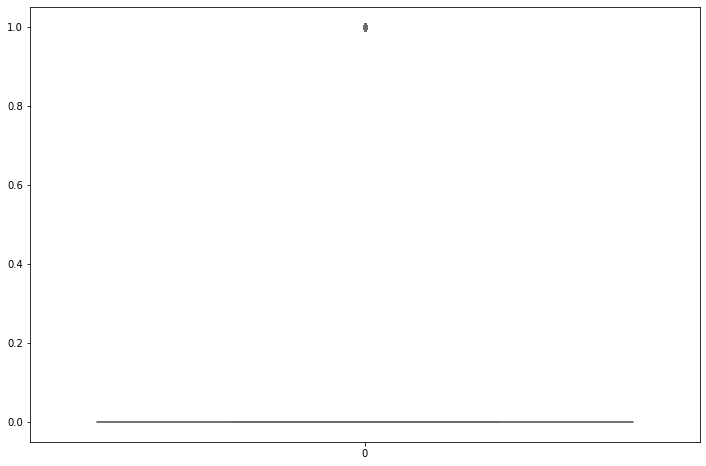

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_homework_Outlier['SeniorCitizen'],palette="husl")
plt.show()

In [ ]:
df_homework_Outlier['SeniorCitizen'].value_counts(normalize = True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Berdasarkan hasil analisa dan pertimbangan dari karakteristik kolom yaitu Yes dan No yang sudah dikategorikan sebagai 1 dan 0. Maka kolom ini tidak memiliki outlier.

###2.2 Kolom 'tenure'

In [ ]:
df_homework_Outlier['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

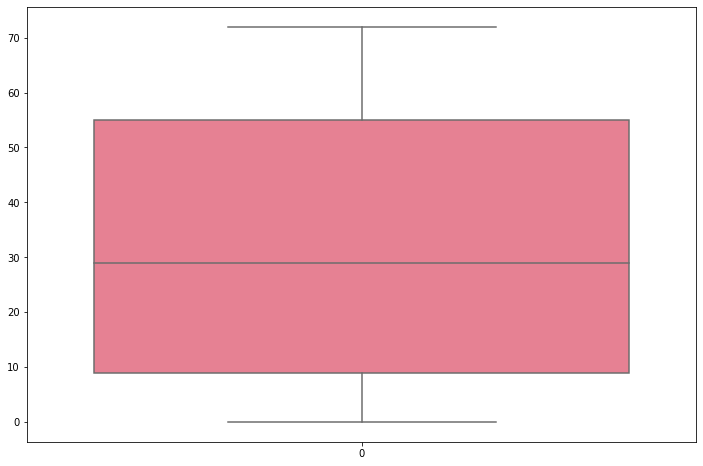

In [ ]:
#Boxplot before
plt.figure(figsize=(12,8))
sns.boxplot(data=df_homework_Outlier['tenure'],palette="husl")
plt.show()

In [ ]:
print(f"Data Dimension before IQR Method: {df_homework_Outlier.shape}")

Data Dimension before IQR Method: (7043, 21)


In [ ]:
# Lets take Absence variable as the threshold

# IQR Calculation and its boundary
Q1 = df_homework_Outlier['tenure'].quantile(0.25)
Q3 = df_homework_Outlier['tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df_homework_Outlier['tenure'] >= lower_boundary) & (df_homework_Outlier['tenure'] <= upper_boundary)

# Apply the filter
df_homework_Outlier = df_homework_Outlier[filter_logic]

In [ ]:
print(f"Data Dimension after IQR Method: {df_homework_Outlier.shape}")

Data Dimension after IQR Method: (7043, 21)


Kolom 'tenure' tidak memiliki outlier ketika menggunakan metode IQR

###2.3 Kolom 'MonthlyCharges	'

In [ ]:
df_homework_Outlier['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

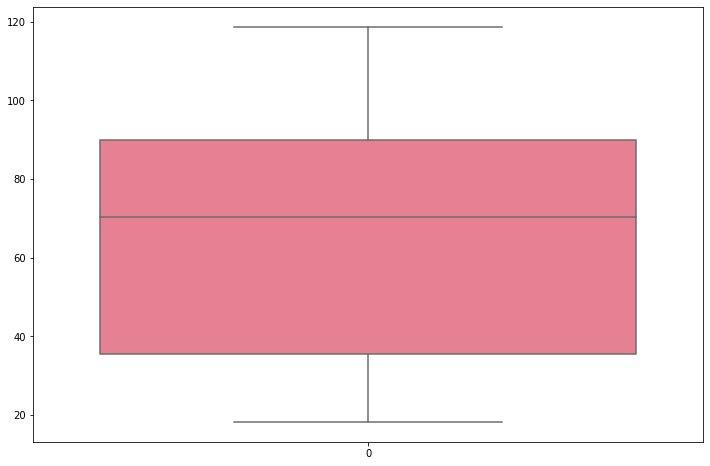

In [ ]:
#Boxplot before
plt.figure(figsize=(12,8))
sns.boxplot(data=df_homework_Outlier['MonthlyCharges'],palette="husl")
plt.show()

In [ ]:
print(f"Data Dimension before IQR Method: {df_homework_Outlier.shape}")

Data Dimension before IQR Method: (7043, 21)


In [ ]:
# Lets take Absence variable as the threshold

# IQR Calculation and its boundary
Q1 = df_homework_Outlier['MonthlyCharges'].quantile(0.25)
Q3 = df_homework_Outlier['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df_homework_Outlier['MonthlyCharges'] >= lower_boundary) & (df_homework_Outlier['MonthlyCharges'] <= upper_boundary)

# Apply the filter
df_homework_Outlier = df_homework_Outlier[filter_logic]

In [ ]:
print(f"Data Dimension after IQR Method: {df_homework_Outlier.shape}")

Data Dimension after IQR Method: (7043, 21)


Kolom 'MonthlyCharges' tidak memiliki outlier ketika menggunakan metode IQR

###2.4 Kolom 'TotalCharges'

In [ ]:
df_homework_Outlier['TotalCharges'].describe()

count    7043.000000
mean     2283.277684
std      2265.000331
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

Dari hasil analisa pertama, dapat dilihat perbedaan yang signifikan antara mean dan median pada kolom 'TotalCharges'

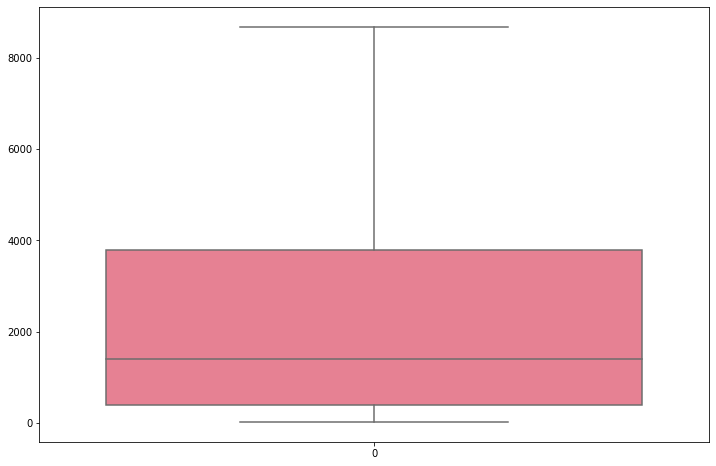

In [ ]:
#Boxplot before
plt.figure(figsize=(12,8))
sns.boxplot(data=df_homework_Outlier['TotalCharges'],palette="husl")
plt.show()

In [ ]:
print(f"Data Dimension before IQR Method: {df_homework_Outlier.shape}")

Data Dimension before IQR Method: (7043, 21)


In [ ]:
# Lets take Absence variable as the threshold

# IQR Calculation and its boundary
Q1 = df_homework_Outlier['TotalCharges'].quantile(0.25)
Q3 = df_homework_Outlier['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df_homework_Outlier['TotalCharges'] >= lower_boundary) & (df_homework_Outlier['TotalCharges'] <= upper_boundary)

# Apply the filter
df_homework_Outlier = df_homework_Outlier[filter_logic]

In [ ]:
print(f"Data Dimension after IQR Method: {df_homework_Outlier.shape}")

Data Dimension after IQR Method: (7043, 21)


In [ ]:
Q3 = df_homework_Outlier['TotalCharges'].quantile(0.75)
print(Q3)
upper_boundary = Q3 + (1.5 * IQR)
print(upper_boundary)

3786.6
8863.1625


Untuk memastikan asumsi diawal bahwa, pada kolom 'TotalCharges' memiliki nilai yang signifikan antara mean dan median. Maka dilakukan pengujian manual dengan melihat nilai 'Upper_boundary', dan hasilnya nilai upper_boundary = 8863.1625, dan nilai max = 8684.800000. Maka diambil kesimpulan Kolom 'MonthlyCharges' tidak memiliki outlier ketika menggunakan metode IQR

## **3. Feature Transformation**

In [ ]:
#Membuat data frame baru untuk dimodifikasi pada bagian 'Feature Transformation'
df_homework_ft = df_homework_Outlier

###3.1 Numberical

In [ ]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

####3.1.1 Kolom 'SeniorCitizen' (Menggubah ke tipe data categorical)

Pada kolom 'SeniorCitizen' tidak dilakukan *feature tranformation* secara langsung, karena jika dilihat dari karakeristik maka kolom 'SeniorCitizen' merupakan tipe data kategorical. Maka saya akan melakukan *handle missing value* lanjutan untuk tabel tersebut, dengan mengubah kolom SeniorCitizen menjadi data categorical.

In [ ]:
df_homework_ft['SeniorCitizen'] = df_homework_ft['SeniorCitizen'].replace([0,1],['No','Yes'])
print(df_homework_ft['SeniorCitizen'])

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object


In [ ]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Kolom 'SeniorCitizen' telah menjadi data cateogorical. Proses One Hot Encoding akan dilakukan pada bagian data kategorical.

####3.1.2 Kolom 'Tenure'

In [ ]:
df_homework_ft['tenure'].sample(25)

5789    25
3868    21
5397     6
685      1
6316    63
6330    23
1878     3
2302    71
4410    16
1482    13
6625    12
6301    67
5884    46
4872    72
3880    26
4182    29
5058    30
4578    10
393     19
4724    50
4628    12
950      2
3649    71
583      1
4862     2
Name: tenure, dtype: int64

In [ ]:
df_homework_ft['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [ ]:
print(df_homework_ft['tenure'].describe())

print(f"Data sebelum dilakukan tranformasi: {df_homework_ft['tenure'].tolist()[:20]}")

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
Data sebelum dilakukan tranformasi: [1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 10, 21]


Menggunakan metode scaling untuk melakukan feature transformation pada kolom 'tenure'.

In [ ]:
# Feature Scaling (n - m)

# As an example, value range is between 0 - 1
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to our data
df_homework_ft['tenure'] = minmax_scaler.fit_transform(df_homework_ft['tenure'].values.reshape(len(df_homework_ft), 1))

# Show the data
print(f"Data sesudah dilakukan tranformasi: {df_homework_ft['tenure'].tolist()[:20]}")
df_homework_ft['tenure'].describe()

Data sesudah dilakukan tranformasi: [0.013888888888888888, 0.4722222222222222, 0.027777777777777776, 0.625, 0.027777777777777776, 0.1111111111111111, 0.3055555555555555, 0.1388888888888889, 0.38888888888888884, 0.861111111111111, 0.18055555555555555, 0.2222222222222222, 0.8055555555555555, 0.6805555555555555, 0.3472222222222222, 0.9583333333333333, 0.7222222222222222, 0.986111111111111, 0.1388888888888889, 0.29166666666666663]


count    7043.000000
mean        0.449599
std         0.341104
min         0.000000
25%         0.125000
50%         0.402778
75%         0.763889
max         1.000000
Name: tenure, dtype: float64

In [ ]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,29.85,29.85
1,0.472222,56.95,1889.50
2,0.027778,53.85,108.15
3,0.625000,42.30,1840.75
4,0.027778,70.70,151.65


####3.1.3 Kolom 'MonthlyCharges'

In [ ]:
df_homework_ft['MonthlyCharges'].sample(25)

1944     25.50
2239     35.70
547     105.05
6320     64.50
2752     35.40
4667     19.25
1697     75.55
6152     93.20
1479     49.05
5415     50.30
3043     30.40
5704     86.85
1748     20.05
702      84.90
1258     20.15
432      53.45
4675    100.00
700      63.30
6553     61.45
2482     45.00
321      60.00
2055    108.45
2987     20.10
2786     56.20
5424     92.70
Name: MonthlyCharges, dtype: float64

In [ ]:
df_homework_ft['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [ ]:
print(df_homework_ft['MonthlyCharges'].describe())

print(f"Data sebelum dilakukan tranformasi: {df_homework_ft['MonthlyCharges'].tolist()[:20]}")

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
Data sebelum dilakukan tranformasi: [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05]


Menggunakan metode scaling untuk melakukan feature transformation pada kolom 'tenure'.

In [ ]:
# Feature Scaling (n - m)

# As an example, value range is between 0 - 1
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to our data
df_homework_ft['MonthlyCharges'] = minmax_scaler.fit_transform(df_homework_ft['MonthlyCharges'].values.reshape(len(df_homework_ft), 1))

# Show the data
print(f"Data sesudah dilakukan tranformasi: {df_homework_ft['MonthlyCharges'].tolist()[:20]}")
df_homework_ft['MonthlyCharges'].describe()

Data sesudah dilakukan tranformasi: [0.11542288557213931, 0.3850746268656716, 0.35422885572139307, 0.23930348258706463, 0.5218905472636816, 0.8099502487562189, 0.7049751243781094, 0.11442786069651739, 0.8611940298507462, 0.3771144278606965, 0.3154228855721393, 0.006965174129353213, 0.8169154228855721, 0.8502487562189055, 0.8681592039800995, 0.945273631840796, 0.023880597014925342, 0.8800995024875623, 0.36766169154228856, 0.7144278606965173]


count    7043.000000
mean        0.462803
std         0.299403
min         0.000000
25%         0.171642
50%         0.518408
75%         0.712438
max         1.000000
Name: MonthlyCharges, dtype: float64

In [ ]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,29.85
1,0.472222,0.385075,1889.50
2,0.027778,0.354229,108.15
3,0.625000,0.239303,1840.75
4,0.027778,0.521891,151.65


####3.1.4 Kolom 'TotalCharges'

In [ ]:
df_homework_ft['TotalCharges'].sample(25)

137     1277.75
6747    1958.95
1066     973.10
2347     203.95
5683    2011.40
1697    4707.85
2954     480.75
1819    3244.40
4426    1264.20
4545      44.15
3269    1600.95
2818    2649.15
605     6094.25
4941      58.15
6392    3069.45
3083    1506.40
2494    2636.05
5844     154.80
1619    5553.25
1998      97.10
4613    4370.25
5819    8250.00
5775    4828.05
2328    3452.55
2678     625.05
Name: TotalCharges, dtype: float64

In [ ]:
df_homework_ft['TotalCharges'].value_counts()

2268.73    11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
print(df_homework_ft['TotalCharges'].describe())

print(f"Data sebelum dilakukan tranformasi: {df_homework_ft['TotalCharges'].tolist()[:20]}")

count    7043.000000
mean     2283.277684
std      2265.000331
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64
Data sebelum dilakukan tranformasi: [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95, 587.45, 326.8, 5681.1, 5036.3, 2686.05, 7895.15, 1022.95, 7382.25, 528.35, 1862.9]


Menggunakan metode scaling untuk melakukan feature transformation pada kolom 'tenure'.

In [ ]:
# Feature Scaling (n - m)

# As an example, value range is between 0 - 1
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to our data
df_homework_ft['TotalCharges'] = minmax_scaler.fit_transform(df_homework_ft['TotalCharges'].values.reshape(len(df_homework_ft), 1))

# Show the data
print(f"Data sesudah dilakukan tranformasi: {df_homework_ft['TotalCharges'].tolist()[:20]}")
df_homework_ft['TotalCharges'].describe()

Data sesudah dilakukan tranformasi: [0.001275098084468036, 0.21586660512347106, 0.010310408492960998, 0.21024117239787676, 0.015330025386568198, 0.09251096238172168, 0.22277867528271408, 0.032667897530579276, 0.3493249480729287, 0.4003173321024694, 0.06561850911608587, 0.035541195476575124, 0.6533925686591276, 0.578986845141934, 0.30778329102238633, 0.9088795291945534, 0.11587237479806141, 0.8496942072467113, 0.05879875375028849, 0.2127971382414032]


count    7043.000000
mean        0.261306
std         0.261366
min         0.000000
25%         0.044245
50%         0.159445
75%         0.434780
max         1.000000
Name: TotalCharges, dtype: float64

In [ ]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


###3.2 Categorical (Encoding)

In [ ]:
df_categorical2 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes


In [ ]:
df_homework_ft_encoding = df_homework_ft

####3.2.1 Kolom 'gender'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['gender'].value_counts().reset_index()

,index,gender
0,Male,3555
1,Female,3488


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['gender'])
df_homework_ft_encoding.iloc[0]

customerID               7590-VHVEG
SeniorCitizen                    No
Partner                         Yes
Dependents                       No
tenure                     0.013889
PhoneService                     No
MultipleLines                    No
InternetService                 DSL
OnlineSecurity                   No
OnlineBackup                    Yes
DeviceProtection                 No
TechSupport                      No
StreamingTV                      No
StreamingMovies                  No
Contract             Month-to-month
PaperlessBilling                Yes
PaymentMethod       Bank Withdrawal
MonthlyCharges             0.115423
TotalCharges               0.001275
Churn                            No
gender_Female                     1
gender_Male                       0
Name: 0, dtype: object

In [ ]:
df_categorical3 = df_homework_ft_encoding.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male
0,7590-VHVEG,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0
1,5575-GNVDE,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1
2,3668-QPYBK,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1
3,7795-CFOCW,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1
4,9237-HQITU,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0


In [ ]:
 df_homework_ft = df_homework_ft_encoding['gender_Female'].replace(['1','0'],[1,0])

In [ ]:
df_homework_ft_encoding['gender_Male'].sum()

3555

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male
0,7590-VHVEG,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0
1,5575-GNVDE,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1
2,3668-QPYBK,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1
3,7795-CFOCW,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1
4,9237-HQITU,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0


####3.2.2 Kolom 'SeniorCitizen'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['SeniorCitizen'].value_counts().reset_index()

,index,SeniorCitizen
0,No,5901
1,Yes,1142


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['SeniorCitizen'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
Partner                          Yes
Dependents                        No
tenure                      0.013889
PhoneService                      No
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Name: 0, dtype: object

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes
0,7590-VHVEG,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0
1,5575-GNVDE,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0
2,3668-QPYBK,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0
3,7795-CFOCW,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0
4,9237-HQITU,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0


####3.2.3 Kolom 'Partner'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['Partner'].value_counts().reset_index()

,index,Partner
0,No,3641
1,Yes,3402


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['Partner'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
Dependents                        No
tenure                      0.013889
PhoneService                      No
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Partner_No                         0
Partner_Yes                        1
Name: 0, dtype: object

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes
0,7590-VHVEG,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1
1,5575-GNVDE,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0,1,0
2,3668-QPYBK,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0
3,7795-CFOCW,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0
4,9237-HQITU,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0


####3.4.4 Kolom 'Dependents'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['Dependents'].value_counts().reset_index()

,index,Dependents
0,No,4933
1,Yes,2110


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['Dependents'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
tenure                      0.013889
PhoneService                      No
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Partner_No                         0
Partner_Yes                        1
Dependents_No                      1
Dependents_Yes                     0
Name: 0, dtype: object

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes
0,7590-VHVEG,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0
3,7795-CFOCW,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0


####3.4.5 Kolom 'PhoneService'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['PhoneService'].value_counts().reset_index()

,index,PhoneService
0,Yes,6361
1,No,682


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['PhoneService'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
tenure                      0.013889
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Partner_No                         0
Partner_Yes                        1
Dependents_No                      1
Dependents_Yes                     0
PhoneService_No                    1
PhoneService_Yes                   0
Name: 0, dtype: object

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes
0,7590-VHVEG,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1
3,7795-CFOCW,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1


####3.4.6 Kolom 'MultipleLines'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['MultipleLines'].value_counts().reset_index()

,index,MultipleLines
0,No,4072
1,Yes,2971


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['MultipleLines'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
tenure                      0.013889
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Partner_No                         0
Partner_Yes                        1
Dependents_No                      1
Dependents_Yes                     0
PhoneService_No                    1
PhoneService_Yes                   0
MultipleLines_No                   1
MultipleLines_Yes                  0
N

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0
4,9237-HQITU,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0


####3.4.7 Kolom 'InternetService'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['InternetService'].value_counts().reset_index()

,index,InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['InternetService'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
OnlineSecurity                              No
OnlineBackup                               Yes
DeviceProtection                            No
TechSupport                                 No
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Ye

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0
1,5575-GNVDE,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,3668-QPYBK,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
3,7795-CFOCW,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0
4,9237-HQITU,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0


####3.4.8 Kolom 'OnlineSecurity'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['OnlineSecurity'].value_counts().reset_index()

,index,OnlineSecurity
0,No,5024
1,Yes,2019


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['OnlineSecurity'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
OnlineBackup                               Yes
DeviceProtection                            No
TechSupport                                 No
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0


####3.4.9 Kolom 'OnlineBackup'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['OnlineBackup'].value_counts().reset_index()

,index,OnlineBackup
0,No,4614
1,Yes,2429


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['OnlineBackup'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
DeviceProtection                            No
TechSupport                                 No
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1
1,5575-GNVDE,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0
2,3668-QPYBK,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1
3,7795-CFOCW,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0
4,9237-HQITU,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0


####3.4.10 Kolom 'DeviceProtection'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['DeviceProtection'].value_counts().reset_index()

,index,DeviceProtection
0,No,4621
1,Yes,2422


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['DeviceProtection'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
TechSupport                                 No
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0
1,5575-GNVDE,No,No,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1
2,3668-QPYBK,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0
3,7795-CFOCW,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
4,9237-HQITU,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0


####3.4.11 Kolom 'TechSupport'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['TechSupport'].value_counts().reset_index()

,index,TechSupport
0,No,4999
1,Yes,2044


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['TechSupport'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines_No                             1
MultipleLines

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes
0,7590-VHVEG,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,No,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0
2,3668-QPYBK,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,No,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
4,9237-HQITU,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0


####3.4.12 Kolom 'StreamingTV'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['StreamingTV'].value_counts().reset_index()

,index,StreamingTV
0,No,4336
1,Yes,2707


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['StreamingTV'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines_No                             1
MultipleLines_Yes                            0
InternetServi

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0
1,5575-GNVDE,No,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0
3,7795-CFOCW,No,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0
4,9237-HQITU,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0


####3.4.13 Kolom 'StreamingMovies'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['StreamingMovies'].value_counts().reset_index()

,index,StreamingMovies
0,No,4311
1,Yes,2732


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['StreamingMovies'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines_No                             1
MultipleLines_Yes                            0
InternetService_DSL                          1
InternetServi

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,One year,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,One year,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


####3.4.14 Kolom 'Contract'

In [ ]:
df_homework_ft['Contract'].value_counts().reset_index()

,index,Contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


Karena kateogri ini memiliki perbedaan, hal ini dapat dilihat bahwa Bula lebih rendah dari 1 tahun dan 2 tahun lebih tinggi dari 1 tahun dan 1 bulan. Maka pada kolom ini menggunakan metode Ordinal Encoding

In [ ]:
# Use .map(class) to replace value by value using dictionary

Contract_class = {"Month-to-month": 1, 
                   "One year": 2,
                   "Two year": 3}


df_homework_ft_encoding['Contract_class'] = df_homework_ft_encoding['Contract'].map(Contract_class)
df_homework_ft_encoding[['Contract_class','Contract']].sample(10)

,Contract_class,Contract
3367,3,Two year
6165,1,Month-to-month
227,1,Month-to-month
381,1,Month-to-month
3725,1,Month-to-month
7018,1,Month-to-month
6681,1,Month-to-month
5570,1,Month-to-month
255,3,Two year
1066,3,Two year


In [ ]:
df_homework_ft_encoding.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class
0,7590-VHVEG,0.013889,Month-to-month,Yes,Bank Withdrawal,0.115423,0.001275,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1
1,5575-GNVDE,0.472222,One year,No,Mailed check,0.385075,0.215867,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,2
2,3668-QPYBK,0.027778,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1
3,7795-CFOCW,0.625000,One year,No,Bank Withdrawal,0.239303,0.210241,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,2
4,9237-HQITU,0.027778,Month-to-month,Yes,Bank Withdrawal,0.521891,0.015330,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


In [ ]:
df_homework_ft_encoding = df_homework_ft_encoding.drop('Contract', axis=1)

In [ ]:
df_homework_ft_encoding.head()

,customerID,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class
0,7590-VHVEG,0.013889,Yes,Bank Withdrawal,0.115423,0.001275,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1
1,5575-GNVDE,0.472222,No,Mailed check,0.385075,0.215867,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,2
2,3668-QPYBK,0.027778,Yes,Mailed check,0.354229,0.010310,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1
3,7795-CFOCW,0.625000,No,Bank Withdrawal,0.239303,0.210241,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,2
4,9237-HQITU,0.027778,Yes,Bank Withdrawal,0.521891,0.015330,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


Kolom 'Contract' berhasil dihapus

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Yes,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,No,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Yes,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,No,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


####3.4.15 Kolom 'PaperlessBilling'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['PaperlessBilling'].value_counts().reset_index()

,index,PaperlessBilling
0,Yes,4171
1,No,2872


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['PaperlessBilling'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines_No                             1
MultipleLines_Yes                            0
InternetService_DSL                          1
InternetService_Fiber optic                  0
InternetService_No                           0
OnlineSecurit

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,7590-VHVEG,Bank Withdrawal,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,Mailed check,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
2,3668-QPYBK,Mailed check,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1
3,7795-CFOCW,Bank Withdrawal,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4,9237-HQITU,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1


####3.4.16 Kolom 'PaymentMethod'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['PaymentMethod'].value_counts().reset_index()

,index,PaymentMethod
0,Bank Withdrawal,3909
1,Mailed check,1612
2,Credit Card,1522


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['PaymentMethod'])
df_homework_ft_encoding.iloc[0]

customerID                       7590-VHVEG
tenure                             0.013889
MonthlyCharges                     0.115423
TotalCharges                       0.001275
Churn                                    No
gender_Female                             1
gender_Male                               0
SeniorCitizen_No                          1
SeniorCitizen_Yes                         0
Partner_No                                0
Partner_Yes                               1
Dependents_No                             1
Dependents_Yes                            0
PhoneService_No                           1
PhoneService_Yes                          0
MultipleLines_No                          1
MultipleLines_Yes                         0
InternetService_DSL                       1
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         1
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check
0,7590-VHVEG,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0
1,5575-GNVDE,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1
3,7795-CFOCW,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0
4,9237-HQITU,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0


####3.4.17 Kolom 'Churn'

In [ ]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['Churn'].value_counts().reset_index()

,index,Churn
0,No,5174
1,Yes,1869


In [ ]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['Churn'])
df_homework_ft_encoding.iloc[0]

customerID                       7590-VHVEG
tenure                             0.013889
MonthlyCharges                     0.115423
TotalCharges                       0.001275
gender_Female                             1
gender_Male                               0
SeniorCitizen_No                          1
SeniorCitizen_Yes                         0
Partner_No                                0
Partner_Yes                               1
Dependents_No                             1
Dependents_Yes                            0
PhoneService_No                           1
PhoneService_Yes                          0
MultipleLines_No                          1
MultipleLines_Yes                         0
InternetService_DSL                       1
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         1
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                

In [ ]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [ ]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0
1,5575-GNVDE,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0
2,3668-QPYBK,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1
3,7795-CFOCW,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0
4,9237-HQITU,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1


###3.3 Kesimpulan

Data Frame df_homework sudah dilakukan Feature Tranformation, baik itu secara Numberical ataupun Kategorical. Hasilnya dapat dilihat pada tabel dibawah:

In [ ]:
df_homework_ft.head(9)

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0.013889,0.115423,0.001275,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0
1,5575-GNVDE,0.472222,0.385075,0.215867,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,2,1,0,0,0,1,1,0
2,3668-QPYBK,0.027778,0.354229,0.010310,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
3,7795-CFOCW,0.625000,0.239303,0.210241,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,2,1,0,1,0,0,1,0
4,9237-HQITU,0.027778,0.521891,0.015330,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1
5,9305-CDSKC,0.111111,0.809950,0.092511,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1
6,1452-KIOVK,0.305556,0.704975,0.222779,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
7,6713-OKOMC,0.138889,0.114428,0.032668,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0
8,7892-POOKP,0.388889,0.861194,0.349325,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1


Pada kolom 'costumerID' masih sama seperti semula, untuk keperluan mengoversi ke tipe numberic maka kolom costumerID akan dihapus!.

In [ ]:
df_homework_FIX = df_homework_ft

In [ ]:
df_homework_FIX = df_homework_FIX.drop('customerID', axis = 1)
df_homework_FIX.head(9)


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0.013889,0.115423,0.001275,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0
1,0.472222,0.385075,0.215867,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,2,1,0,0,0,1,1,0
2,0.027778,0.354229,0.010310,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
3,0.625000,0.239303,0.210241,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,2,1,0,1,0,0,1,0
4,0.027778,0.521891,0.015330,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1
5,0.111111,0.809950,0.092511,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1
6,0.305556,0.704975,0.222779,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
7,0.138889,0.114428,0.032668,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0
8,0.388889,0.861194,0.349325,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1


In [ ]:
#Convert all coloms to numberic
df_homework_FIX = df_homework_FIX.apply(pd.to_numeric)

In [ ]:
df_homework_FIX.head(9)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0.013889,0.115423,0.001275,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0
1,0.472222,0.385075,0.215867,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,2,1,0,0,0,1,1,0
2,0.027778,0.354229,0.010310,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
3,0.625000,0.239303,0.210241,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,2,1,0,1,0,0,1,0
4,0.027778,0.521891,0.015330,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1
5,0.111111,0.809950,0.092511,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1
6,0.305556,0.704975,0.222779,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
7,0.138889,0.114428,0.032668,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0
8,0.388889,0.861194,0.349325,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1


Data frame **'df_homework_FIX'** sudah selesai dilakukan proses Data Cleaning!, Terima kasih....

In [ ]:
#Export dataframe!!!
df_homework_FIX.to_csv('df_homework_FIX.csv')

***SEMANGAT !!!***